# MS DHONI Performance Analysis (Is he still good enough to play IPL)

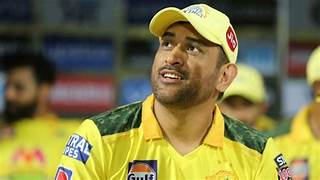

Let's read IPL ball by ball Dataset

In [332]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [333]:
df = pd.read_csv('cleaned_ipl_dataset_2008_to_2023.csv')

In [334]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,0,1,PP


In [336]:
df.innings.unique()  #check super over data + super over data

array([1, 2], dtype=int64)

In [337]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [338]:
df.innings.unique()  #check super over data + super over data

array([1, 2], dtype=int64)

In [165]:
# What are the numbers when ABD faces Bumrah?
# step 1: Filter by player names - Done
# step 2: Use these names & assign it to striker & bowler - Done
# step 3: Get the required columns - Done

In [339]:
Dhoni_df = df[df.striker == 'MS Dhoni']

In [340]:
Dhoni_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
265,335983,2008,2008-04-19,Punjab Cricket Association IS Bindra Stadium,1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,3,MO


In [341]:
SeasonbySeason =pd.DataFrame(Dhoni_df.groupby('season')['runs_off_bat'].sum()).reset_index()

In [342]:
bowled_faced=pd.DataFrame(Dhoni_df.groupby('season')['ball'].count()).reset_index()

In [343]:
SeasonbySeason= SeasonbySeason.merge(bowled_faced, on = 'season', how = 'left')

In [344]:
SeasonbySeason

,season,runs_off_bat,ball
0,2008,414,319
1,2009,332,270
2,2010,287,215
3,2011,392,247
4,2012,358,283
5,2013,461,298
6,2014,371,258
7,2015,372,309
8,2016,284,220
9,2017,290,261


In [345]:
SeasonbySeason['strike rate']= 100* SeasonbySeason['runs_off_bat']/SeasonbySeason['ball']

In [346]:
SeasonbySeason

,season,runs_off_bat,ball,strike rate
0,2008,414,319,129.780564
1,2009,332,270,122.962963
2,2010,287,215,133.488372
3,2011,392,247,158.704453
4,2012,358,283,126.501767
5,2013,461,298,154.697987
6,2014,371,258,143.798450
7,2015,372,309,120.388350
8,2016,284,220,129.090909
9,2017,290,261,111.111111


In [348]:
SeasonbySeason = SeasonbySeason.rename(columns={'strike rate': 'strike_rate'})


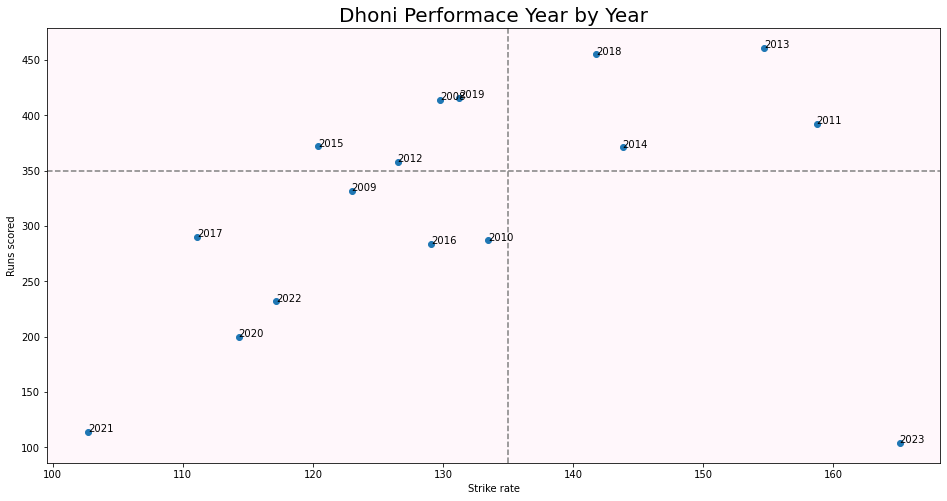

In [349]:
plt.figure(figsize = (16, 8))
plt.scatter(SeasonbySeason.strike_rate, SeasonbySeason.runs_off_bat)

for i in range(len(SeasonbySeason)):
    plt.text(SeasonbySeason['strike_rate'][i], SeasonbySeason['runs_off_bat'][i], SeasonbySeason['season'][i] )


plt.axvline(135, ls = '--', color = 'grey')
plt.axhline(350, ls = '--', color = 'grey')
plt.title('Dhoni Performace Year by Year', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

Observation is Dhoni's Strike Rate and Runs scored are pretty decent since 2020 but his role is finisher as we need check how he performed as finisher in those year also we need to check how other finishers performace with respect to him

# Dhoni's Stats as finishers (SEASON BY SEASON)

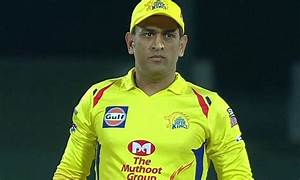

In [429]:
Finishers_stats = Dhoni_df[Dhoni_df.phase=="DO"]

In [430]:
Finishers_stats.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
1728,335989,2008,2008-04-23,MA Chidambaram Stadium,1,16.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,16,3,DO
1730,335989,2008,2008-04-23,MA Chidambaram Stadium,1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,16,5,DO
1731,335989,2008,2008-04-23,MA Chidambaram Stadium,1,16.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,16,6,DO
1732,335989,2008,2008-04-23,MA Chidambaram Stadium,1,17.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DS Kulkarni,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,17,1,DO
1733,335989,2008,2008-04-23,MA Chidambaram Stadium,1,17.2,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DS Kulkarni,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,17,2,DO


In [431]:
Finishers_stats_runs =pd.DataFrame(Finishers_stats.groupby('season')['runs_off_bat'].sum()).reset_index()

In [432]:
Finishers_stats_runs_balls =pd.DataFrame(Finishers_stats.groupby('season')['ball'].count()).reset_index()

In [433]:
Finishers_stats_overall = Finishers_stats_runs.merge(Finishers_stats_runs_balls, on = 'season', how = 'left')

In [434]:
Finishers_stats_overall

,season,runs_off_bat,ball
0,2008,162,86
1,2009,109,65
2,2010,80,33
3,2011,212,97
4,2012,172,112
5,2013,240,129
6,2014,253,142
7,2015,179,106
8,2016,168,92
9,2017,134,84


In [435]:
Finishers_stats_overall['strike rate']= 100* Finishers_stats_overall['runs_off_bat']/Finishers_stats_overall['ball']

In [436]:
Finishers_stats_overall

,season,runs_off_bat,ball,strike rate
0,2008,162,86,188.372093
1,2009,109,65,167.692308
2,2010,80,33,242.424242
3,2011,212,97,218.556701
4,2012,172,112,153.571429
5,2013,240,129,186.046512
6,2014,253,142,178.169014
7,2015,179,106,168.867925
8,2016,168,92,182.608696
9,2017,134,84,159.523810


In [437]:
Finishers_stats_overall['strike rate']= 100* Finishers_stats_overall['runs_off_bat']/Finishers_stats_overall['ball']

In [438]:
Finishers_stats_overall = Finishers_stats_overall.rename(columns={'strike rate': 'strike_rate'})


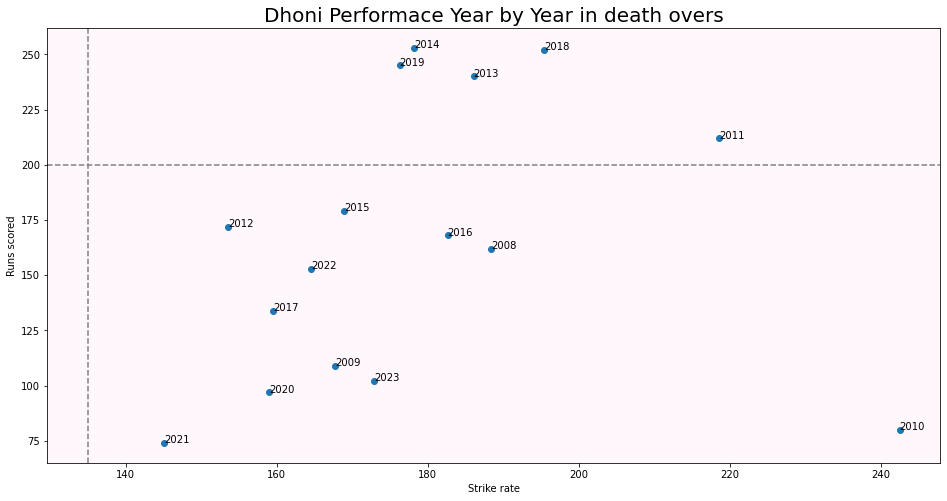

In [439]:
plt.figure(figsize = (16, 8))
plt.scatter(Finishers_stats_overall.strike_rate, Finishers_stats_overall.runs_off_bat)

for i in range(len(Finishers_stats_overall)):
    plt.text(Finishers_stats_overall['strike_rate'][i], Finishers_stats_overall['runs_off_bat'][i], Finishers_stats_overall['season'][i] )


plt.axvline(135, ls = '--', color = 'grey')
plt.axhline(200, ls = '--', color = 'grey')
plt.title('Dhoni Performace Year by Year in death overs', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

Dhoni has pretty decent records as finisher in 2020 and 2021 for CSK but 2022 was good but 2023 is decent but he faced very less balls 

Let's compare his finishing with other finihsers in same year

# IPL Batters Stats from 2020 to 2023 as finishers (MIN 150 Balls faced) 

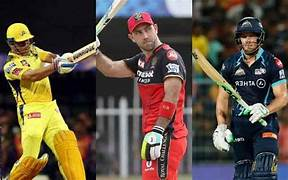

In [440]:
All_Finishers_stats_2020 = df[(df.phase=="DO") & ((df.season>=2020)  & (df.season<=2023))]

In [441]:
All_Finishers_stats_2020.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
179057,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,16.1,Mumbai Indians,Chennai Super Kings,KH Pandya,KA Pollard,L Ngidi,0,0,NaN,NaN,NaN,NaN,NaN,caught,KH Pandya,NaN,NaN,Right-arm fast,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,16,1,DO
179058,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,16.2,Mumbai Indians,Chennai Super Kings,JL Pattinson,KA Pollard,L Ngidi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,16,2,DO
179059,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,16.3,Mumbai Indians,Chennai Super Kings,KA Pollard,JL Pattinson,L Ngidi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,16,3,DO
179060,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,16.4,Mumbai Indians,Chennai Super Kings,JL Pattinson,KA Pollard,L Ngidi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,16,4,DO
179061,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,16.5,Mumbai Indians,Chennai Super Kings,KA Pollard,JL Pattinson,L Ngidi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,16,5,DO


In [442]:
Finishers_stats_runs_2020 =pd.DataFrame(All_Finishers_stats_2020.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [445]:
Finishers_stats_runs_2020

,striker,runs_off_bat
0,A Badoni,212
1,A Manohar,85
2,A Mishra,13
3,A Nortje,43
4,A Zampa,5
5,AB de Villiers,358
6,AD Russell,309
7,AF Milne,13
8,AJ Hosein,16
9,AK Markram,142


In [446]:
Finishers_stats_runs_2020_bowled_faced=pd.DataFrame(All_Finishers_stats_2020.groupby('striker')['ball'].count()).reset_index()

In [447]:
Finishers_stats_runs_2020_bowled_faced

,striker,ball
0,A Badoni,137
1,A Manohar,47
2,A Mishra,12
3,A Nortje,37
4,A Zampa,5
5,AB de Villiers,163
6,AD Russell,186
7,AF Milne,15
8,AJ Hosein,11
9,AK Markram,74


In [448]:
Finishers_stats_2020_overall = Finishers_stats_runs_2020.merge(Finishers_stats_runs_2020_bowled_faced, on = 'striker', how = 'left')

In [449]:
Finishers_stats_2020_overall.dtypes

striker         object
runs_off_bat    int64 
ball            int64 
dtype: object

In [450]:
Finishers_stats_2020_overall= Finishers_stats_2020_overall[Finishers_stats_2020_overall.ball >150]

In [451]:
Finishers_stats_2020_overall['strike rate']= 100* Finishers_stats_2020_overall['runs_off_bat']/Finishers_stats_2020_overall['ball']

In [452]:
Finishers_stats_2020_overall

,striker,runs_off_bat,ball,strike rate
5,AB de Villiers,358,163,219.631902
6,AD Russell,309,186,166.129032
11,AR Patel,328,205,160.000000
42,DA Miller,316,205,154.146341
62,GJ Maxwell,280,157,178.343949
67,HH Pandya,446,248,179.838710
98,KA Pollard,432,244,177.049180
99,KD Karthik,528,295,178.983051
104,KL Rahul,311,177,175.706215
119,M Shahrukh Khan,237,155,152.903226


In [453]:
Finishers_stats_2020_overall.reset_index(inplace = True, drop = True)

In [456]:
Finishers_stats_2020_overall

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,358,163,219.631902
1,AD Russell,309,186,166.129032
2,AR Patel,328,205,160.000000
3,DA Miller,316,205,154.146341
4,GJ Maxwell,280,157,178.343949
5,HH Pandya,446,248,179.838710
6,KA Pollard,432,244,177.049180
7,KD Karthik,528,295,178.983051
8,KL Rahul,311,177,175.706215
9,M Shahrukh Khan,237,155,152.903226


In [454]:
Finishers_stats_2020_overall = Finishers_stats_2020_overall.rename(columns={'strike rate': 'strike_rate'})


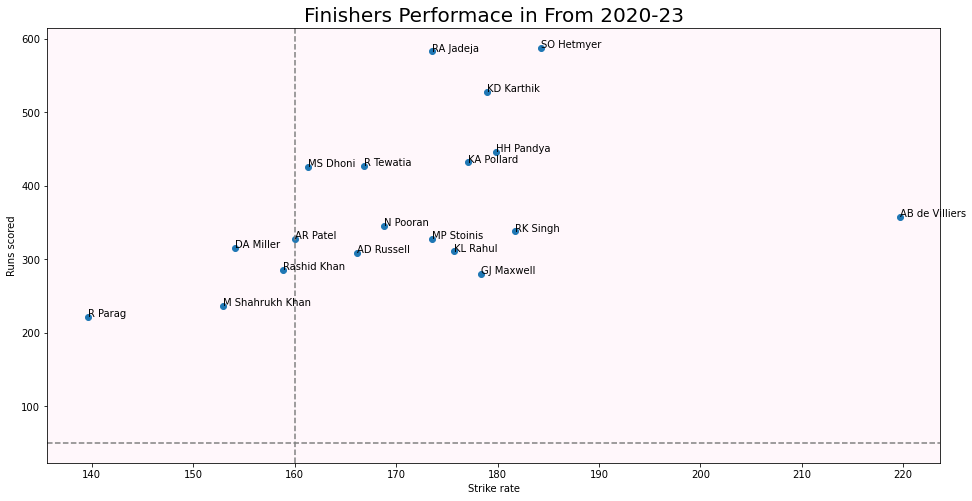

In [455]:
plt.figure(figsize = (16, 8))
plt.scatter(Finishers_stats_2020_overall.strike_rate, Finishers_stats_2020_overall.runs_off_bat)

for i in range(len(Finishers_stats_2020_overall)):
    plt.text(Finishers_stats_2020_overall['strike_rate'][i], Finishers_stats_2020_overall['runs_off_bat'][i], Finishers_stats_2020_overall['striker'][i] )


plt.axvline(160, ls = '--', color = 'grey')
plt.axhline(50, ls = '--', color = 'grey')
plt.title('Finishers Performace in From 2020-23', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

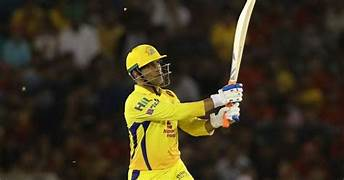 

Dhoni has good stats as finisher scoring 400+ runs with SR of 147 which is almost equivalent to Axar patel (In past 4 years)

But is It only role Dhoni is doing for CSK????  
Answer is NO!!!!



# DHONI BEHIND THE STUMPS

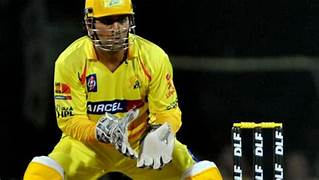

AS We know Dhoni is one of the Greatest cricketing mind behind the stumps.
3G, 4G and 5G then comes MS DHONI behind the stumps.
he is still the quickest as we can't forgot Shubnam Gill's dismissal in IPL 2023 final




DHONI has always great asset to CSK in all round way!1
And it's true as batter he has been pretty decent in past years but as captain/leader/WK, he is great asset!! 